## Final Project Submission

Please fill out:
* Student name: Michael Flores
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier # K-nearest Neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, r2_score, mean_squared_error
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
%matplotlib inline

In [2]:
data = pd.read_csv('CSV Files/chicago_cleaned_dataset.zip', compression = 'zip')
data.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROAD_DEFECT,INTERSECTION_RELATED_I,...,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,ALIGNMENT_STRAIGHT,ROADWAY_SURFACE_COND_DRY,CRASH_TYPE_NO_INJURY,DAMAGE_DOLLARS
0,0564e565ebda939c88d5da6d613ac5789b702cbff5b874...,20,SIGNAL,FUNCTIONING PROPERLY,CLEAR,LIGHT,PERSON/ANIMAL,NOT DIVIDED,0,0,...,0.0,15,3,12,41.954196,-87.669193,1,1,1,500 OR LESS
1,0fa4884149aa03acef4572d0d6b4de24104843772f177e...,30,OTHER,NO CONTROLS,CLEAR,LIGHT,TURNING,NOT DIVIDED,0,0,...,0.0,15,4,9,41.759853,-87.644338,1,1,1,OVER 1500
2,14d735b2068198c785b0449abe59c143ccf8fe564776ad...,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED CAR/OBJECT,NOT DIVIDED,0,0,...,0.0,18,1,11,41.924362,-87.745377,1,1,1,501 THRU 1500
3,1d191ccd52478ee352b4f9326a406c7a311ce140f19fff...,35,SIGNAL,NO CONTROLS,CLEAR,LIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),0,1,...,0.0,12,1,12,41.946544,-87.703072,1,1,1,501 THRU 1500
4,1d6129948f25958aaa828c48f46ede1d07d9a14a29431f...,30,NO CONTROLS,NO CONTROLS,CLEAR,SOME LIGHT,PARKED CAR/OBJECT,ONE-WAY,0,0,...,1.0,23,4,9,41.892782,-87.615890,1,1,0,OVER 1500


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63768 entries, 0 to 63767
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63768 non-null  object 
 1   POSTED_SPEED_LIMIT        63768 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE    63768 non-null  object 
 3   DEVICE_CONDITION          63768 non-null  object 
 4   WEATHER_CONDITION         63768 non-null  object 
 5   LIGHTING_CONDITION        63768 non-null  object 
 6   FIRST_CRASH_TYPE          63768 non-null  object 
 7   TRAFFICWAY_TYPE           63768 non-null  object 
 8   ROAD_DEFECT               63768 non-null  int64  
 9   INTERSECTION_RELATED_I    63768 non-null  int64  
 10  NOT_RIGHT_OF_WAY_I        63768 non-null  int64  
 11  HIT_AND_RUN_I             63768 non-null  int64  
 12  PRIM_CONTRIBUTORY_CAUSE   63768 non-null  object 
 13  DOORING_I                 63768 non-null  int64  
 14  WORK_Z

In [16]:
data = data.drop(columns = ['CRASH_RECORD_ID'])

In [17]:
# Establish predictor and result variables
X = data.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)  
y = data['PRIM_CONTRIBUTORY_CAUSE'] 

In [18]:
data_dummies = pd.get_dummies(X)

In [19]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63768 entries, 0 to 63767
Data columns (total 64 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   POSTED_SPEED_LIMIT                                63768 non-null  int64  
 1   ROAD_DEFECT                                       63768 non-null  int64  
 2   INTERSECTION_RELATED_I                            63768 non-null  int64  
 3   NOT_RIGHT_OF_WAY_I                                63768 non-null  int64  
 4   HIT_AND_RUN_I                                     63768 non-null  int64  
 5   DOORING_I                                         63768 non-null  int64  
 6   WORK_ZONE_I                                       63768 non-null  int64  
 7   WORKERS_PRESENT_I                                 63768 non-null  int64  
 8   NUM_UNITS                                         63768 non-null  int64  
 9   INJURIES_TOTAL   

In [20]:
data_dummies.head()

,POSTED_SPEED_LIMIT,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,INJURIES_TOTAL,...,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_TRAFFIC ROUTE,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_MAJOR INJURIES,MOST_SEVERE_INJURY_MINOR INJURIES,MOST_SEVERE_INJURY_NO INJURY,DAMAGE_DOLLARS_500 OR LESS,DAMAGE_DOLLARS_501 THRU 1500,DAMAGE_DOLLARS_OVER 1500
0,20,0,0,0,0,0,0,0,2,0.0,...,0,0,0,0,0,0,1,1,0,0
1,30,0,0,0,0,0,0,0,2,0.0,...,0,0,0,0,0,0,1,0,0,1
2,30,0,0,0,1,0,0,0,2,0.0,...,0,0,0,0,0,0,1,0,1,0
3,35,0,1,0,0,0,0,0,2,0.0,...,0,0,0,0,0,0,1,0,1,0
4,30,0,0,0,0,0,0,0,2,1.0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
data_dummies.columns

Index(['POSTED_SPEED_LIMIT', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORKERS_PRESENT_I', 'NUM_UNITS', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'ALIGNMENT_STRAIGHT', 'ROADWAY_SURFACE_COND_DRY',
       'CRASH_TYPE_NO_INJURY', 'TRAFFIC_CONTROL_DEVICE_NO CONTROLS',
       'TRAFFIC_CONTROL_DEVICE_OTHER', 'TRAFFIC_CONTROL_DEVICE_SIGN',
       'TRAFFIC_CONTROL_DEVICE_SIGNAL',
       'DEVICE_CONDITION_FUNCTIONING IMPROPERLY/ MISSING',
       'DEVICE_CONDITION_FUNCTIONING PROPERLY', 'DEVICE_CONDITION_NO CONTROLS',
       'WEATHER_CONDITION_CLEAR', 'WEATHER_CONDITION_OTHER',
       'WEATHER_CONDITION_PRECIPITATION', 'LIGHTING_CONDITION_DARKNESS',
       'LIGHTING_CONDITION_LIGHT', 'LIGHTING_CONDITION_SOME LIGHT',
       'FIRST_CRASH_TYPE_ANGLE', 'FIRST_CRASH_TYPE_HEAD ON',
       'FIRST_CRASH_TYPE_OTHER NONCOLLISION', 'FIRST_CRASH_TYPE_OVERTURNED',


# Model 1 - K- Nearest Neighbors

In [22]:
# Create a train-test split of the data, with 25% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(data_dummies, y, test_size=0.25, random_state=42)

In [23]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_dummies)
# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

,POSTED_SPEED_LIMIT,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DOORING_I,WORK_ZONE_I,WORKERS_PRESENT_I,NUM_UNITS,INJURIES_TOTAL,...,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_TRAFFIC ROUTE,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_MAJOR INJURIES,MOST_SEVERE_INJURY_MINOR INJURIES,MOST_SEVERE_INJURY_NO INJURY,DAMAGE_DOLLARS_500 OR LESS,DAMAGE_DOLLARS_501 THRU 1500,DAMAGE_DOLLARS_OVER 1500
0,0.197149,-0.133869,-0.642103,-0.202729,1.879128,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,-0.236090,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,-0.586896,0.770947
1,0.197149,-0.133869,1.557383,-0.202729,-0.532162,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,-0.236090,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,-0.586896,0.770947
2,-2.590304,-0.133869,-0.642103,-0.202729,1.879128,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,-0.236090,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,-0.586896,0.770947
3,0.197149,-0.133869,-0.642103,4.932704,-0.532162,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,4.235681,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,1.703880,-1.297106
4,0.197149,-0.133869,-0.642103,-0.202729,-0.532162,-0.042443,-0.069363,-0.041443,-0.123347,-0.390369,...,-0.236090,-0.060078,-0.041189,-0.034845,-0.15386,-0.427605,0.466805,-0.363285,-0.586896,0.770947


In [12]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [13]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average= 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds,average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds,average= 'weighted')))
    
print_metrics(y_test, test_preds)

Precision Score: 0.615843398341419
Recall Score: 0.6305356918830761
Accuracy Score: 0.6305356918830761
F1 Score: 0.619466223665974


In [14]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=10):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds,average= 'weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [15]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 9
F1-Score: 0.6389041195035063


In [24]:
X_train = scaled_data_train
X_test = scaled_data_test

In [17]:
clf = KNeighborsClassifier(n_neighbors = 9)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
test_preds = clf.predict(X_test)

In [18]:
print_metrics(y_test, test_preds)

Precision Score: 0.6353906909847924
Recall Score: 0.6553130096600176
Accuracy Score: 0.6553130096600176
F1 Score: 0.6389041195035063


<Figure size 720x720 with 0 Axes>

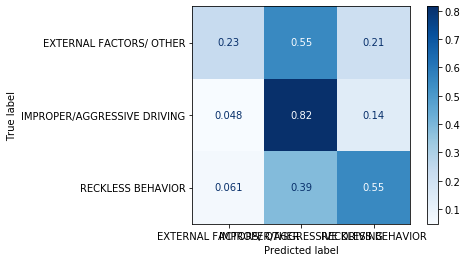

In [19]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(clf, X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.show()

# Model 2 - Decision Trees

In [20]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=42)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [21]:
y_pred = classifier.predict(X_test)  

In [24]:
print_metrics(y_test, y_pred)

Precision Score: 0.5679878216732228
Recall Score: 0.5646719357671559
Accuracy Score: 0.5646719357671559
F1 Score: 0.566277272302482


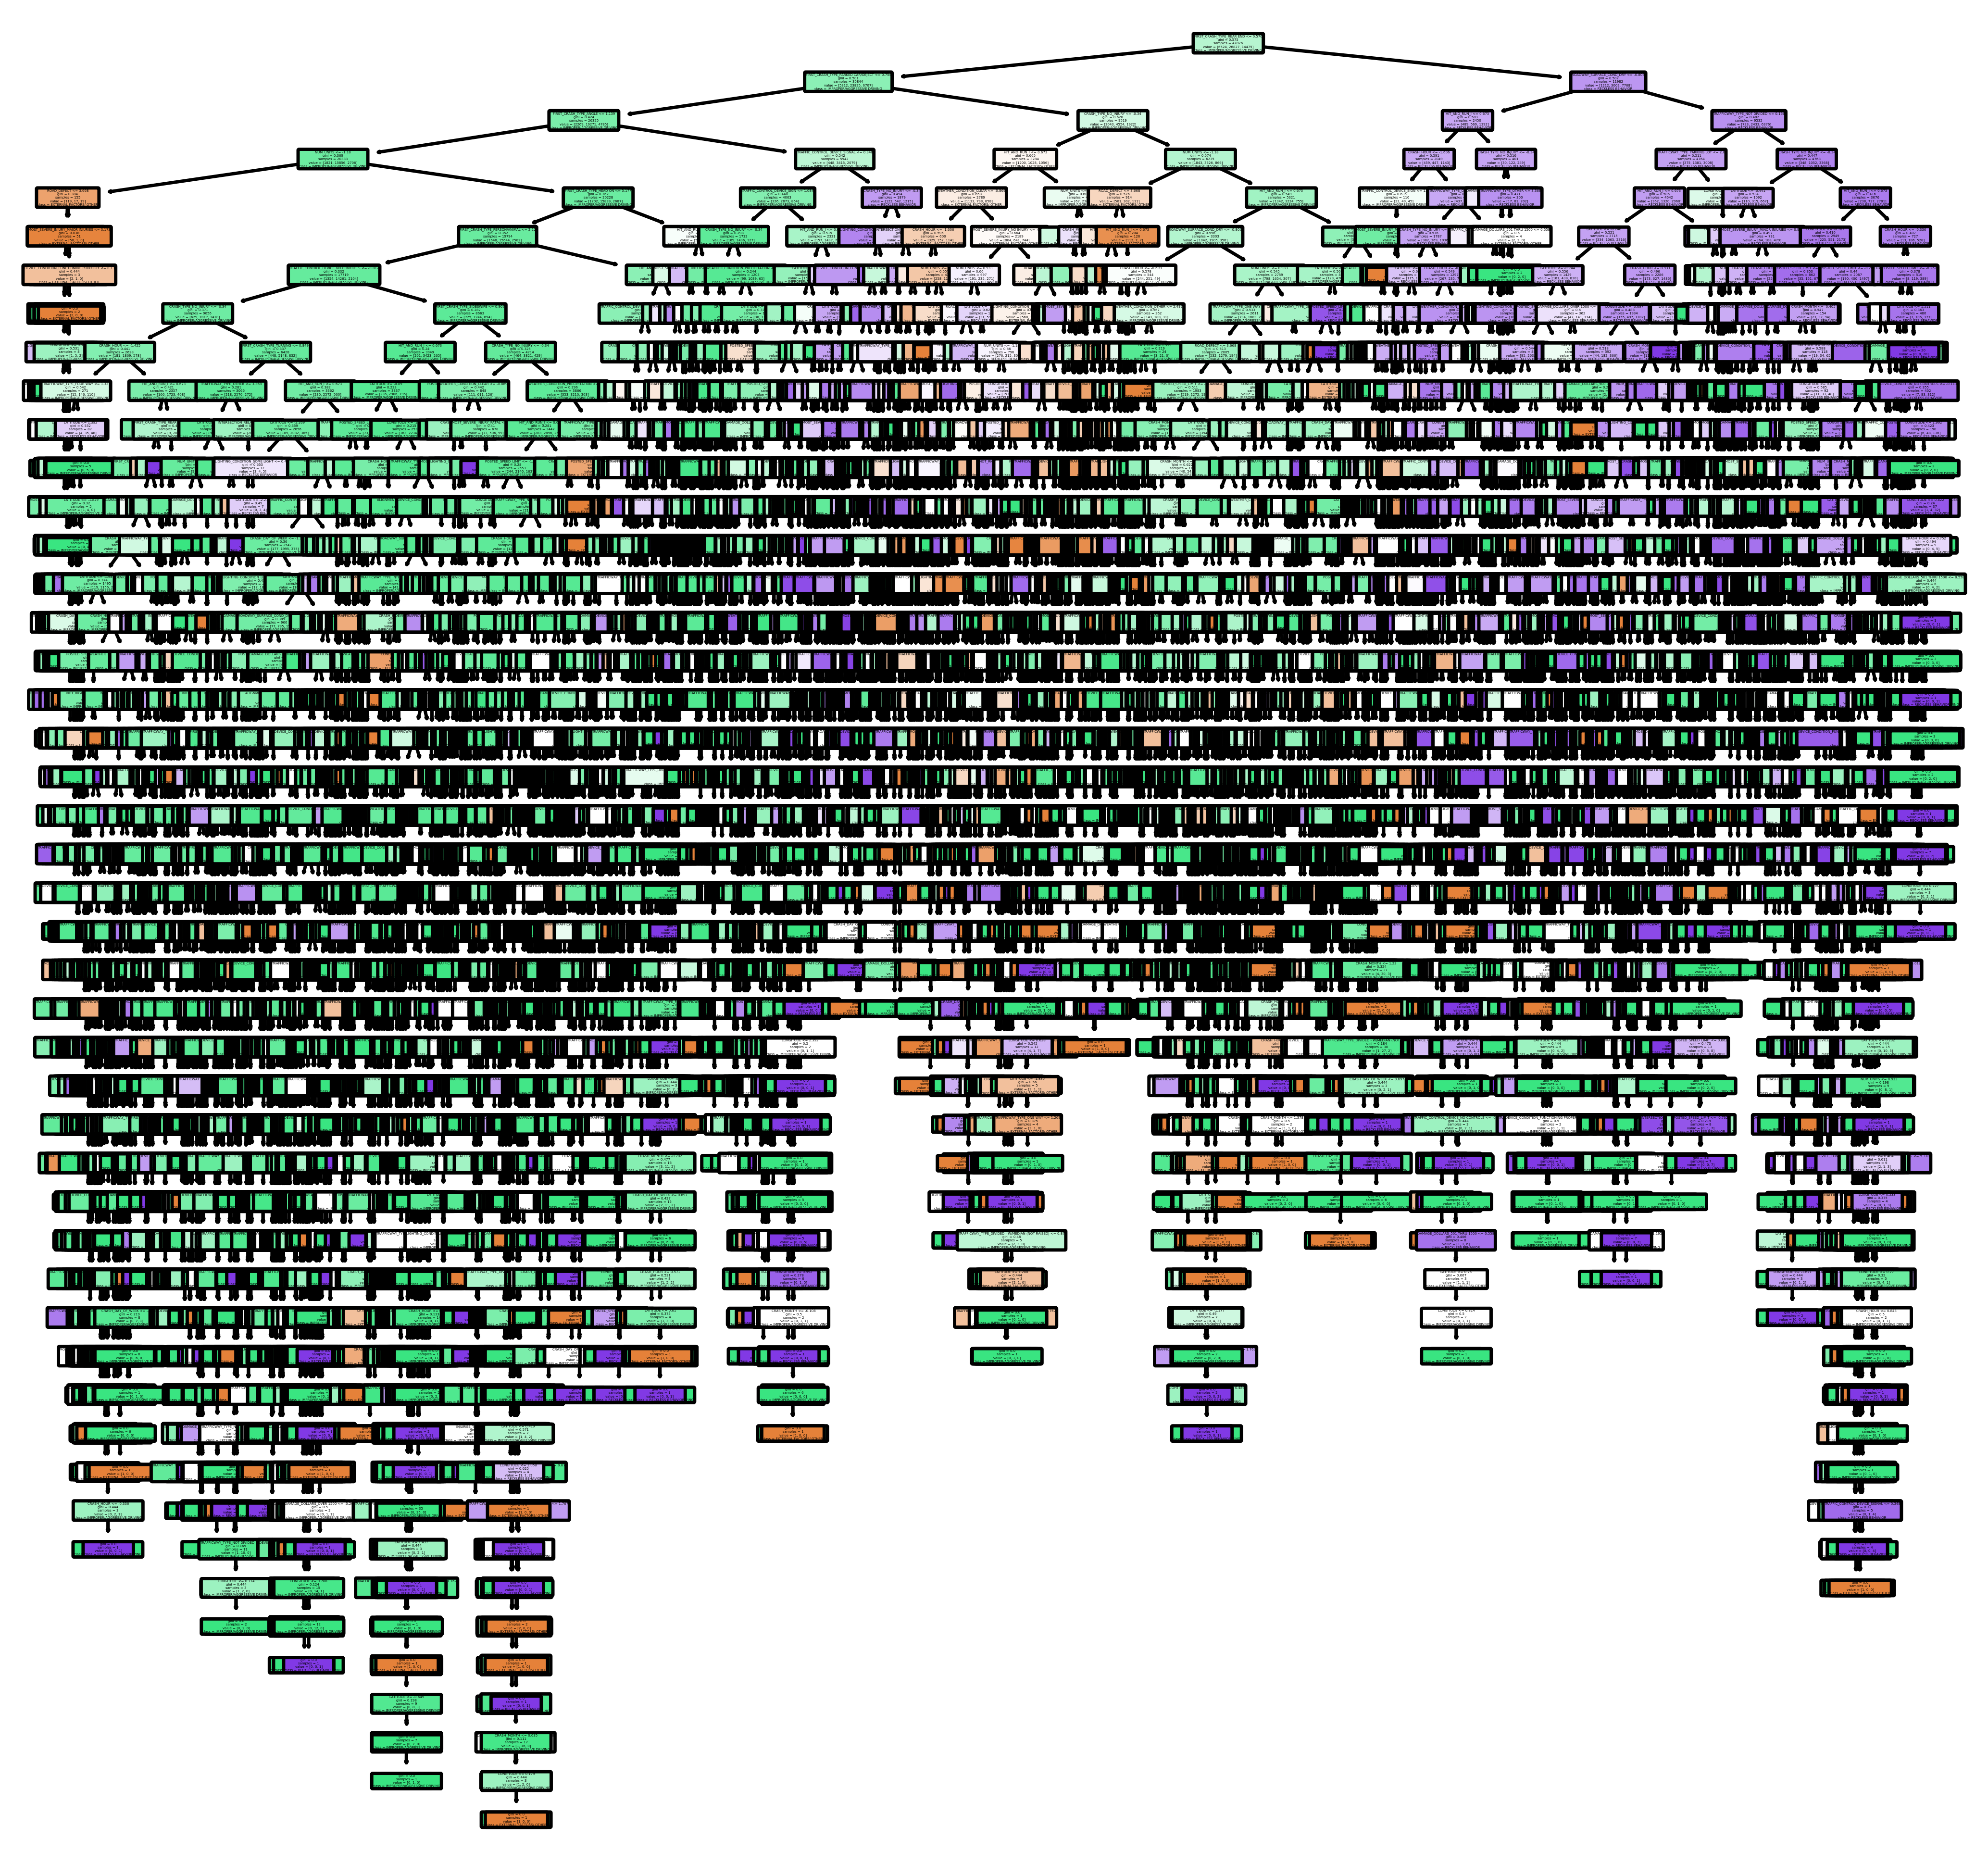

In [25]:
plt.figure(figsize=(10,10), dpi=500)
tree.plot_tree(classifier, 
               feature_names=data_dummies.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

<Figure size 720x720 with 0 Axes>

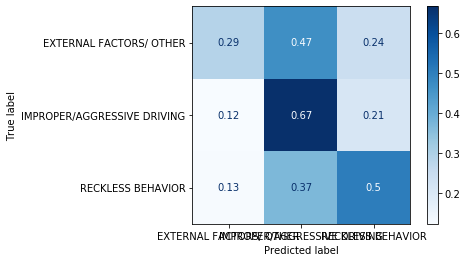

In [26]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(classifier, X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.show()

# Model 3 - Random Forests

In [27]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5,class_weight = 'balanced', random_state = 42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [28]:
tree_clf.feature_importances_

array([0.        , 0.00393398, 0.        , 0.        , 0.0716351 ,
       0.        , 0.        , 0.        , 0.04842721, 0.0004261 ,
       0.00126584, 0.        , 0.        , 0.00391077, 0.00131648,
       0.        , 0.03330513, 0.01869764, 0.        , 0.        ,
       0.01720961, 0.05353626, 0.        , 0.        , 0.        ,
       0.0017696 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06137849, 0.        , 0.        , 0.        ,
       0.26268425, 0.        , 0.41525795, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00251013, 0.00089564, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00124048,
       0.        , 0.        , 0.        , 0.00059936])

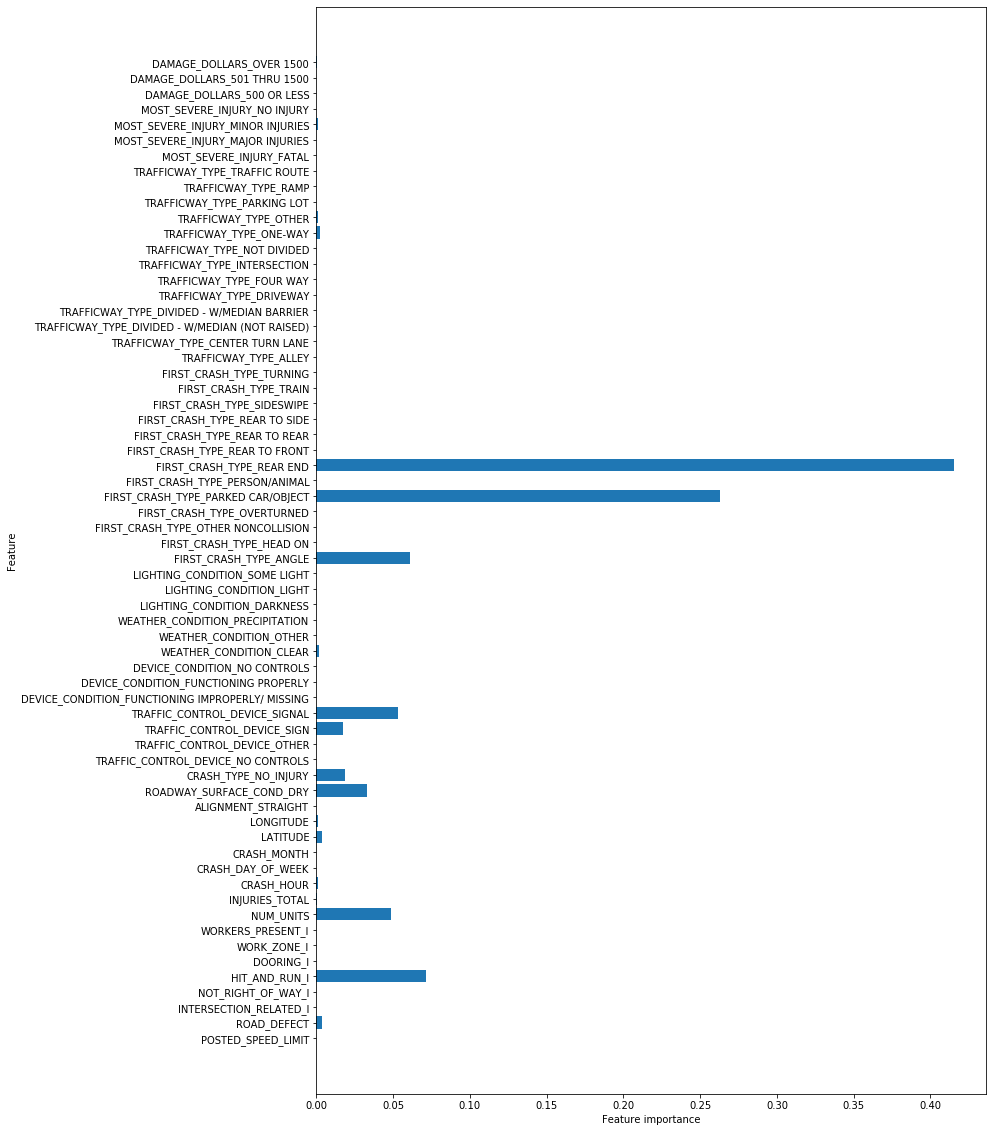

In [29]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [30]:
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 963  775  475]
 [1042 6578 1277]
 [ 532 1326 2974]]
                             precision    recall  f1-score   support

    EXTERNAL FACTORS/ OTHER       0.38      0.44      0.41      2213
IMPROPER/AGGRESSIVE DRIVING       0.76      0.74      0.75      8897
          RECKLESS BEHAVIOR       0.63      0.62      0.62      4832

                   accuracy                           0.66     15942
                  macro avg       0.59      0.60      0.59     15942
               weighted avg       0.67      0.66      0.66     15942



In [31]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight = 'balanced', random_state = 42), 
                                 n_estimators=20)

In [32]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,

In [33]:
bagged_tree.score(X_train, y_train)

0.6673357587922887

In [34]:
bagged_tree.score(X_test, y_test)

0.6583239242253168

<Figure size 720x720 with 0 Axes>

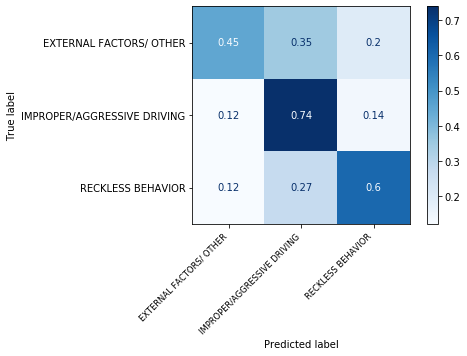

In [35]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(bagged_tree, X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
plt.show()

In [36]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight = 'balanced', random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
forest.score(X_train, y_train)

0.6314766026847322

In [38]:
forest.score(X_test, y_test)

0.6226947685359427

<Figure size 720x720 with 0 Axes>

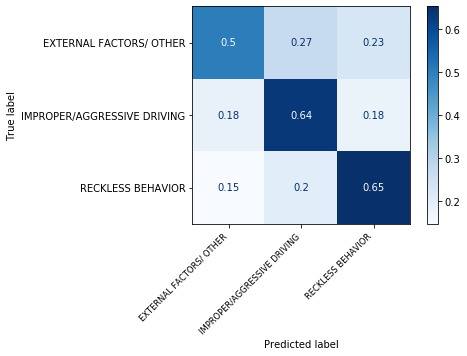

In [39]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(forest, X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
plt.show()

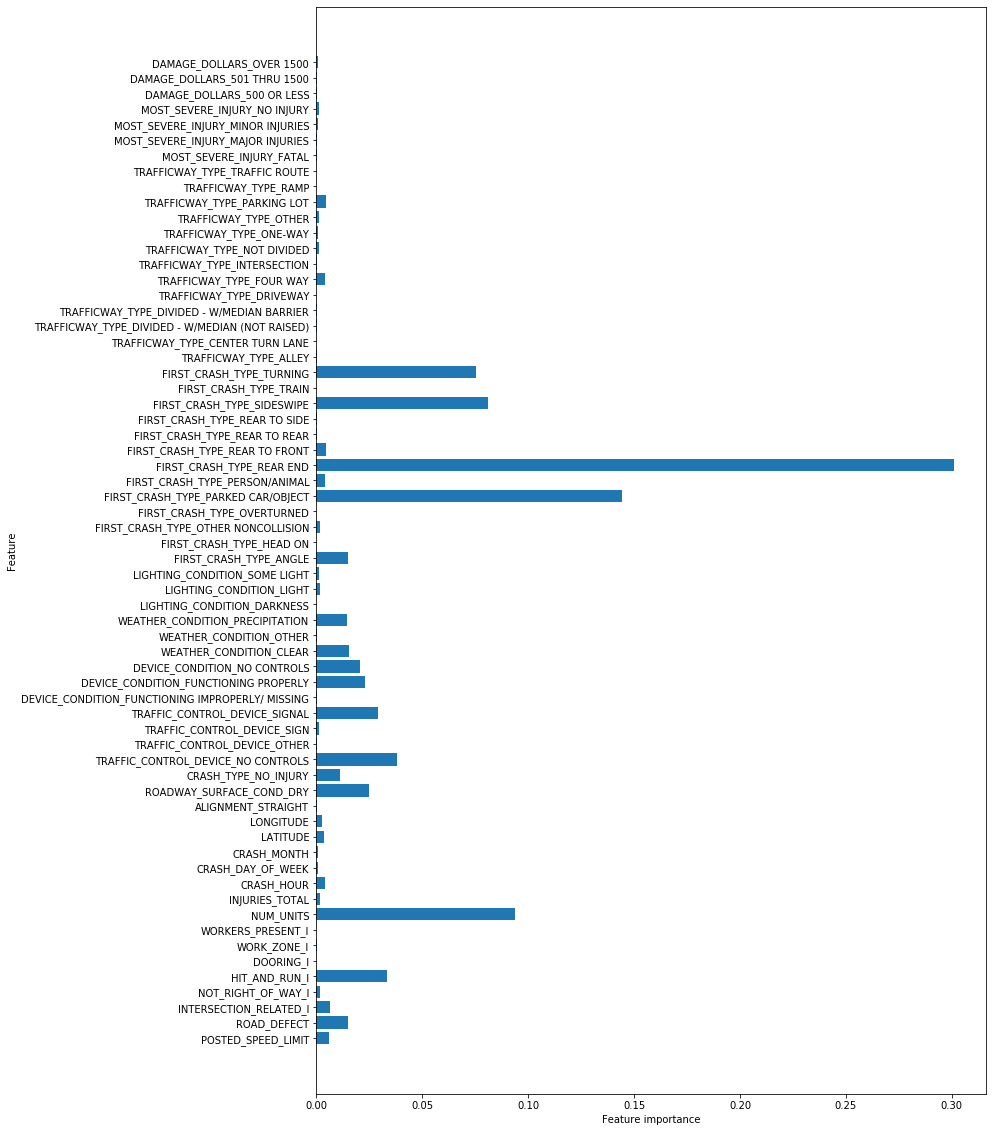

In [40]:
plot_feature_importances(forest)

# Model 4 - Gridsearch

In [41]:
dt_clf = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 56.65%


In [42]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [43]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'cr

In [44]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 67.27%
Mean Test Score: 65.96%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [45]:
rf_clf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 68.62%


In [48]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [49]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 67.70%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


<Figure size 720x720 with 0 Axes>

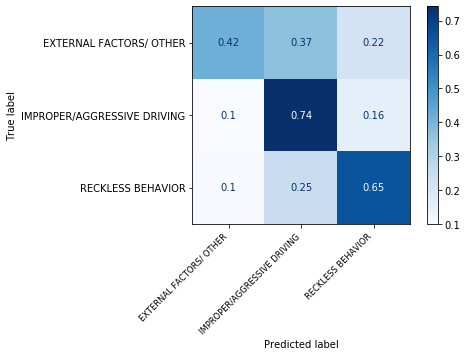

In [50]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(rf_grid_search, X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
plt.show()

<Figure size 720x720 with 0 Axes>

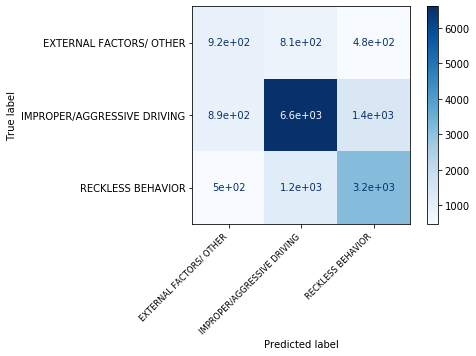

In [51]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(rf_grid_search, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
plt.show()

# Model 5 - XGBoost

In [13]:
clf = xgb.XGBClassifier(random_state = 42)
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 69.54%
Validation accuracy: 68.71%


In [14]:
param_grid = {
    "early_stopping_rounds": [10],
    "learning_rate": [0.1],
    'max_depth': [5,6],
    'min_child_weight': [10],
    'subsample': [0.75],
    'n_estimators': [200, 250],
}

In [69]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
early_stopping_rounds: 10
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 200
subsample: 0.75

Training Accuracy: 72.82%
Validation accuracy: 69.17%


<Figure size 720x720 with 0 Axes>

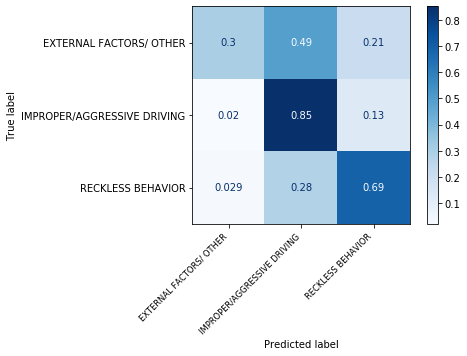

In [70]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(grid_clf, X_train, y_train,
                     cmap=plt.cm.Blues,normalize='true')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'  
)
plt.show()

<Figure size 720x720 with 0 Axes>

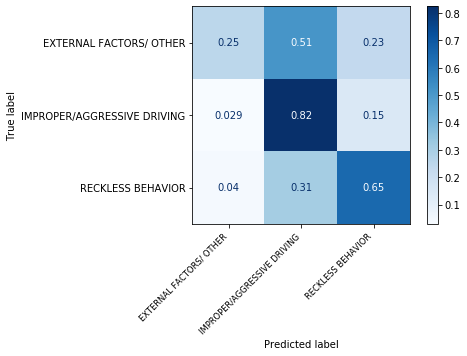

In [80]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(grid_clf,X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'
)
plt.show()

<Figure size 720x720 with 0 Axes>

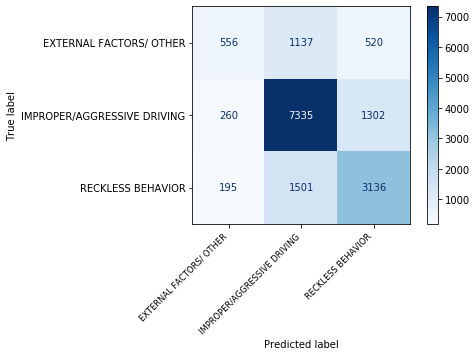

In [81]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(grid_clf, X_test, y_test, values_format = '.0f',
                     cmap=plt.cm.Blues)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='small'
)
plt.show()

I also attempted to run an instance of XGBoost that would use a balanced class weight to perform but it kept resulting in a dead kernel. I'd like to try again and evaluate as to why this kept occurring. The code I tried to run is below.

In [2]:
# class_weights_data = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)
# class_weights_data

In [1]:
# Results in dead kernel

# clf = xgb.XGBClassifier(random_state = 42)
# clf.fit(X_train, y_train,sample_weight = class_weights_data)
# training_preds = clf.predict(X_train)
# val_preds = clf.predict(X_test)
# training_accuracy = accuracy_score(y_train, training_preds)
# val_accuracy = accuracy_score(y_test, val_preds)

# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))